In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import f,t
import itertools

#  D√©tails, pr√©paration et filtrage des donn√©es

Cet ensemble de donn√©es fournit une vue d'ensemble d√©taill√©e des routines d'exercice, des attributs physiques et des mesures de la condition physique des membres d'une salle de sport. Il contient 973 √©chantillons de donn√©es sur les salles de sport, y compris des indicateurs de performance cl√©s tels que la fr√©quence cardiaque, les calories br√ªl√©es et la dur√©e de l'entra√Ænement. Chaque entr√©e comprend √©galement des donn√©es d√©mographiques et des niveaux d'exp√©rience, ce qui permet une analyse compl√®te des sch√©mas de remise en forme, de la progression des athl√®tes et des tendances en mati√®re de sant√©.
Ce jeu de donn√©es comporte 15 variables (ou colonnes) pr√©sentant √† la fois des donn√©es continues et d'autres discr√®tes. Afin de mener √† bien notre analyse, nous nous sommes restreints aux valeurs continues, celles discr√®tes √©tant peu exploitables ou peu int√©ressantes.
Nous avons ainsi s√©lectionn√© des variables tels que l'√¢ge, le poids, l'IMC etc.. soit 10 variables en tout.

In [70]:
df = pd.read_csv("gym_members_exercise_tracking.csv")

# On garde uniquement les variables continues pour l'analyse (Calories_Burned incluse)
continuous_vars = [
    "Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM",
    "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "BMI"
]
df = df[continuous_vars]

df

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56         88.3        1.71      180      157           60   
1     46         74.9        1.53      179      151           66   
2     32         68.1        1.66      167      122           54   
3     25         53.2        1.70      190      164           56   
4     38         46.1        1.79      188      158           68   
..   ...          ...         ...      ...      ...          ...   
968   24         87.1        1.74      187      158           67   
969   25         66.6        1.61      184      166           56   
970   59         60.4        1.76      194      120           53   
971   32        126.4        1.83      198      146           62   
972   46         88.7        1.63      166      146           66   

     Calories_Burned  Fat_Percentage  Water_Intake (liters)    BMI  
0             1313.0            12.6                    3.5  30.20  
1              883.0            33.9                    2.1  32.00  
2              677.0            33.4                    2.3  24.71  
3              532.0            28.8                    2.1  18.41  
4              556.0            29.2                    2.8  14.39  
..               ...             ...                    ...    ...  
968           1364.0            10.0                    3.5  28.77  
969           1260.0            25.0                    3.0  25.69  
970            929.0            18.8                    2.7  19.50  
971            883.0            28.2                    2.1  37.74  
972            542.0            28.8                    3.5  33.38  

[973 rows x 10 columns]

# Mise en place des diff√©rentes corr√©lations

Afin de repr√©senter les diff√©rentes corr√©lations possibles entre les valeurs, nous avons affich√© une matrice de corr√©lation qui a mis en avant d'importantes corr√©lations. On retrouve par exemple une corr√©lation de 0.85 entre la quantit√© d'eau bue en fonction du poids de la personne. D'autres liens comme la proportion de calories br√ªl√©es en fonction du pourcentage de graisse ont pu √™tre mis en avant.

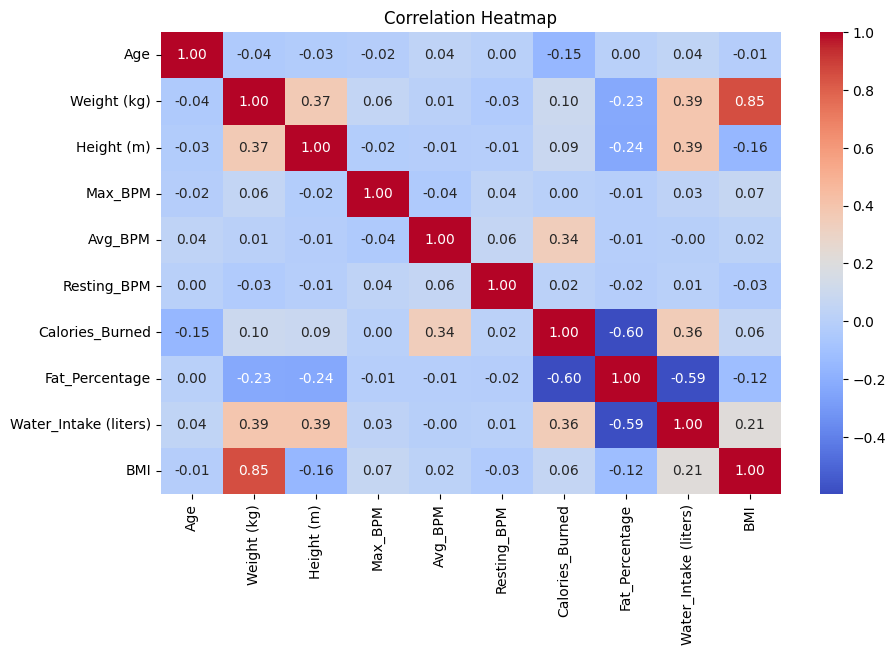

In [71]:
# Compute the correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

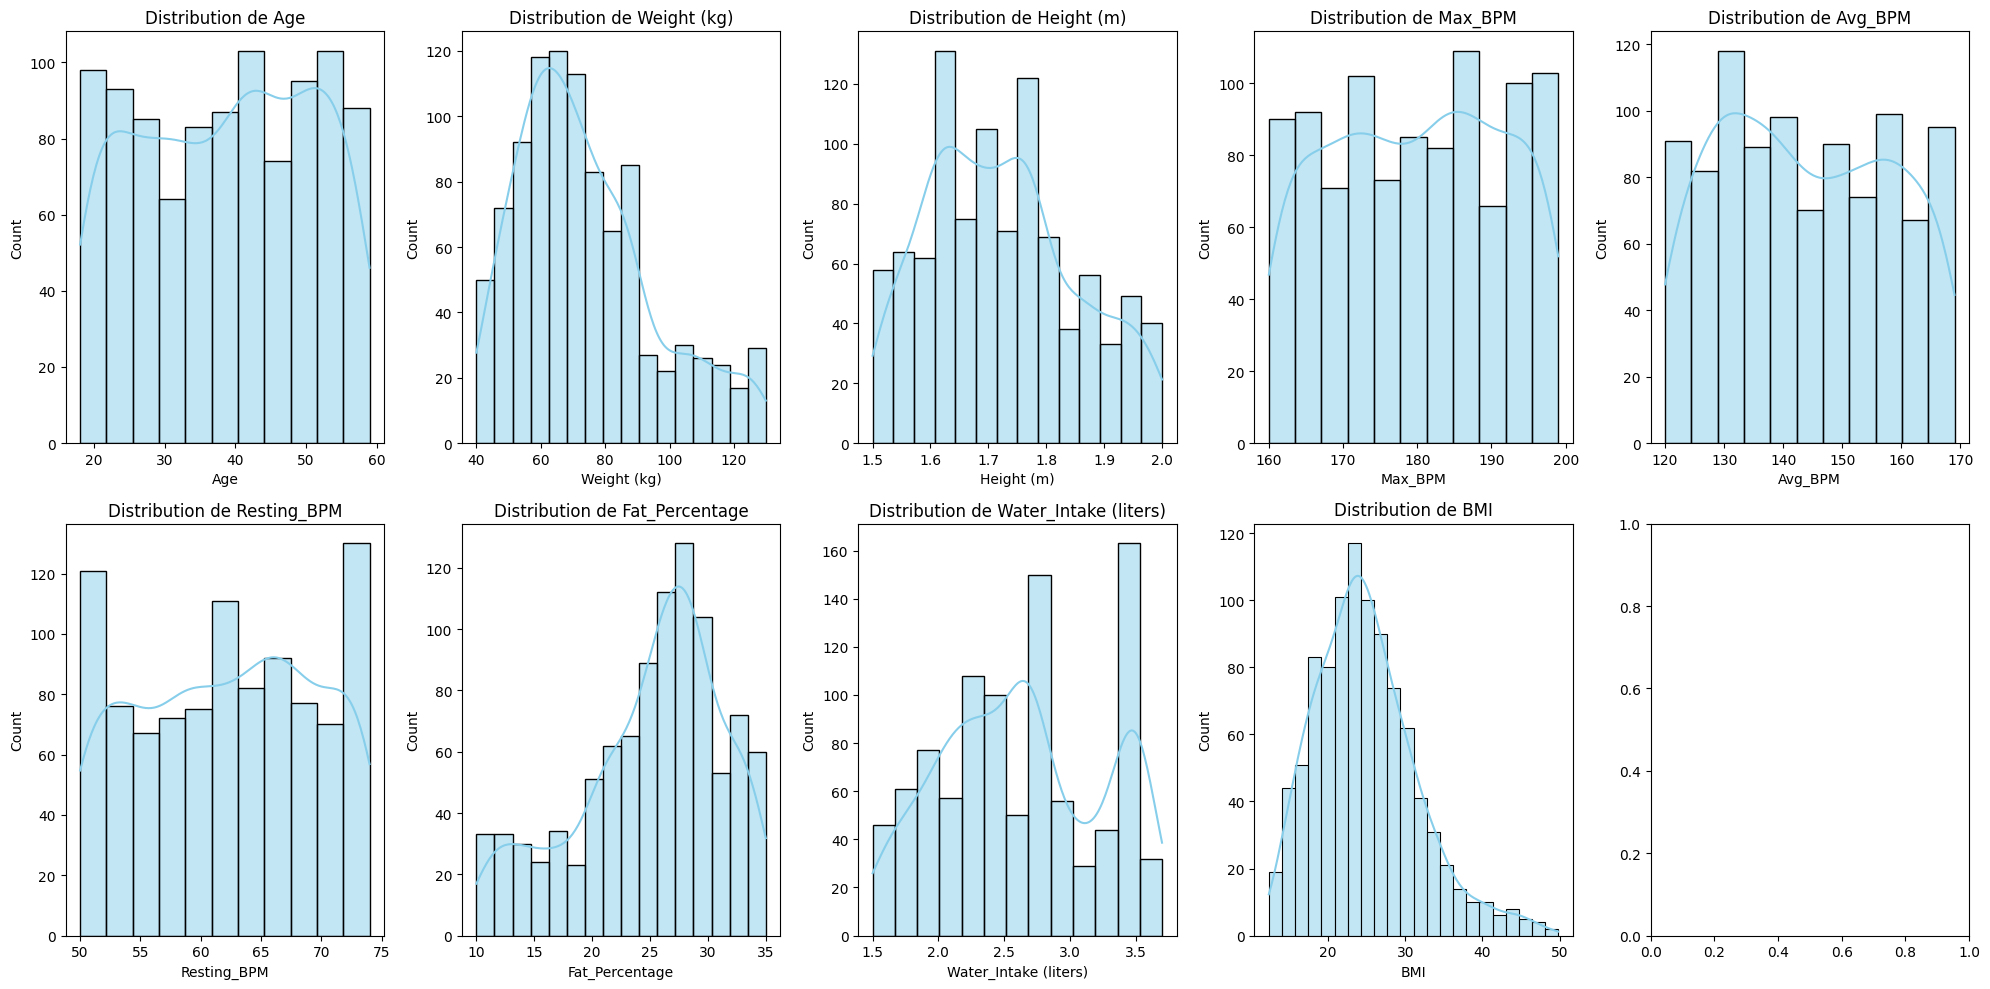

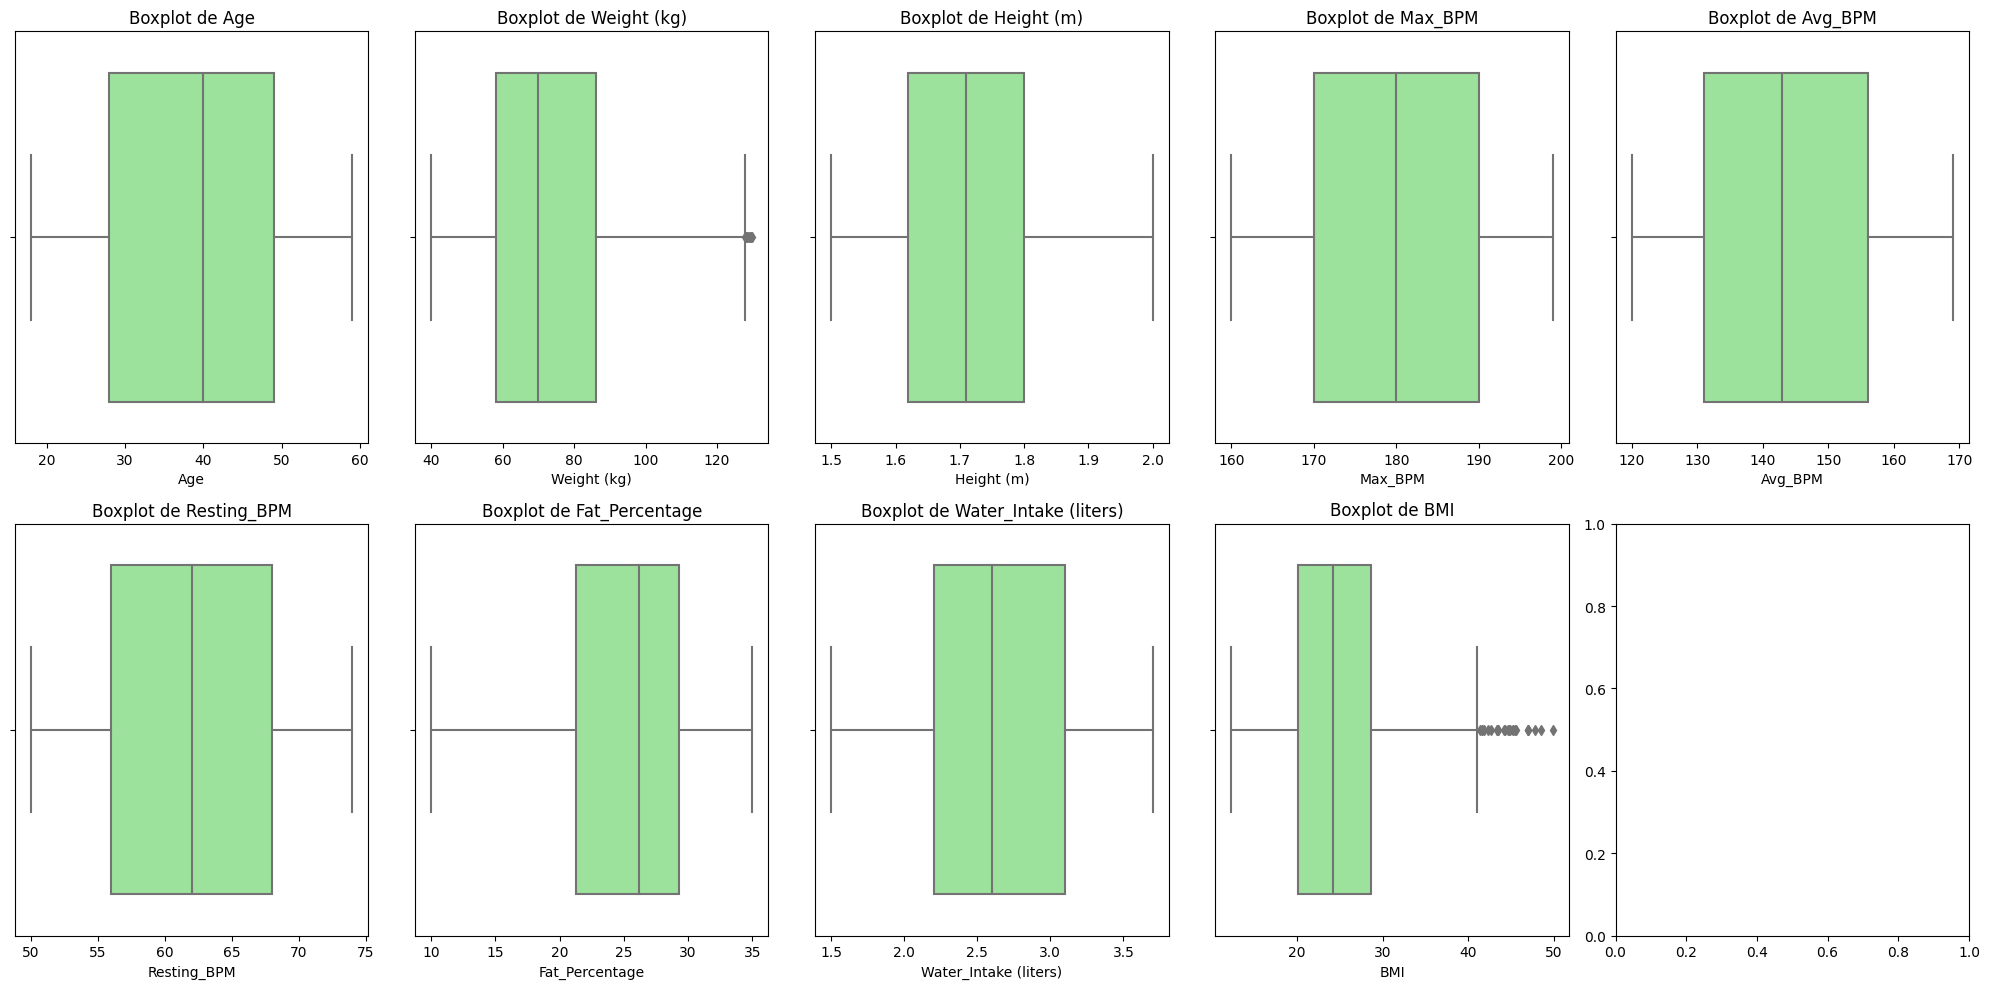

In [72]:
# √âtape 1 : Pr√©paration et filtrage des donn√©es

# S√©paration des variables explicatives et de la cible
X = df.drop(columns=['Calories_Burned'])
y = df['Calories_Burned']

# Standardisation des variables explicatives
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 1. Histogrammes et boxplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Standardisation des donn√©es

Nous avons ensuite d√©cid√© de baser notre r√©gression lin√©aire sur l'attribut "Calories_Burned" soit le nombre de calories moyens br√ªl√©s en fonction d'autres variables de ce dataset.
Nous avons tout d'abord s√©par√© la variable cible des variables explicatives, que nous avons standardis√© afin de faciliter la r√©gression lin√©aire et de ne pas rencontrer de probl√®mes d'√©chelles (entre les diff√©rentes variables) et ne pas avoir de coefficients du mod√®le biais√©s.

Nous avons √©galement proc√©d√© √† l'affichage de plots pour rep√©rer de potentiels outliers (valeurs aberrantes), de visualiser la dispersion des donn√©es ou des diff√©rences de distribution entre variables. √Ä cette √©tape du code, nous avons compris la nature des donn√©es, proc√©d√© √† un nettoyage de celles-ci ainsi qu'√† leur standardisation.

Ensuite, nous avons cr√©√© et ajust√© un mod√®le de r√©gression lin√©aire multiple entre notre variable cible Calories_Burned et les autres variables continues. Nous avons √©galement obtenu un r√©sum√© statistique d√©taill√© : R¬≤ a une valeur de 50.4%, le mod√®le explique donc 50,4% de la variabilit√© de Calories_Burned, ce qui est mod√©r√©ment bon. La F-statistic est de 108.6, le mod√®le est donc significatif et on en conclut qu'au moins une variable a un effet sur Calories_Burned. Nous avons √©galement d√©termin√© les principaux p√©dicteurs, √† savoir les variables significatives (Age, Avg_BPM, Fat_Percentage, Water_Intake) et les non-significatives (Weight, Height, Max_BPM, Resting_BPM, BMI). Le fait qu'une variable ait une p-value √©lev√©e dans un mod√®le multivari√© ne signifie pas n√©cessairement qu'elle est inutile. Celles-ci n'ont pas d'effet net d√©tect√© mais qui pourraient avoir un effet via la colin√©arit√© ou la suppression d'autres variables

# 1er Mod√®le de R√©gression Lin√©aire 
## Mod√®le de R√©gression Multiple Compl√®te

In [73]:
### modele FULL
# 3. Standardize the continuous data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=continuous_vars)

# 4. Define features and target
X = df_scaled.drop(columns=["Calories_Burned"])  # Features
y = df_scaled["Calories_Burned"]                 # Target

# 5. Add constant and fit the model
X = sm.add_constant(X)
modele_full = sm.OLS(y, X).fit()

# 6. Display the model summary
print(modele_full.summary())



                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 20 May 2025   Prob (F-statistic):          6.38e-140
Time:                        20:27:19   Log-Likelihood:                -1039.8
No. Observations:                 973   AIC:                             2100.
Df Residuals:                     963   BIC:                             2148.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.888e-

F-statistic: 108.6
Prob (F-statistic): 6.38e-140 <<<0.05
On rejette l'hypoth√®se nulle ‚Üí au moins une variable a un effet significatif sur le nombre de calories br√ªl√©es.

D‚Äôapr√®s les p-values individuelles :

variables non-significatives
- Weight (kg) 0.777
- Height (m) 0.589   
- Max_BPM 0.728  
- Avg_BPM 0.3427  
- Resting_BPM 0.492   
- BMI 0.986                     

Cela signifie que en pr√©sence des autres variables (Age, Avg_BPM, Fat_Percentage, BMI), ces variables n‚Äôont pas d'effet significatif sur Calories_Burned.

Le fait qu'une variable ait une p-value √©lev√©e dans un mod√®le multivari√© ne signifie pas n√©cessairement qu'elle est inutile. Elle peut :
- √™tre utile en interaction avec une autre,
- devenir significative si certaines variables sont retir√©es (probl√®mes de colin√©arit√©),
- contribuer √† am√©liorer la pr√©diction globale m√™me si elle n'est pas significative seule.

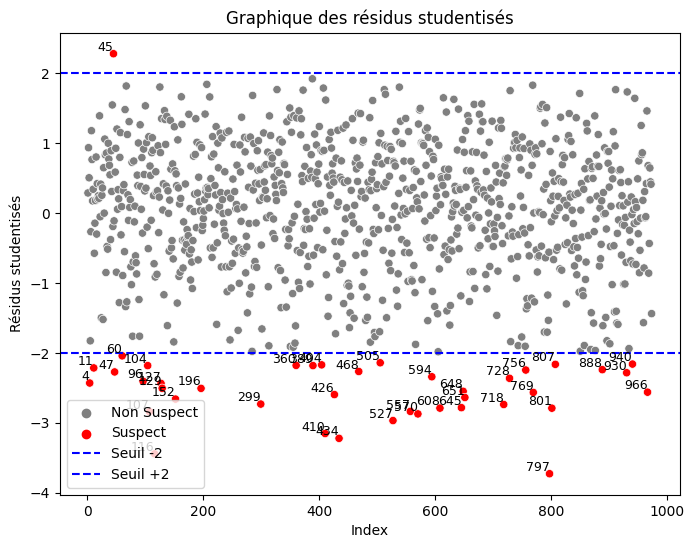

In [74]:
modele1 = modele_full

# 1. Compute Studentized Residuals
residu_student = modele1.get_influence().resid_studentized_internal

# 2. Create DataFrame
df_residus = pd.DataFrame({"residu": residu_student})

# Number of observations
n = len(df["Calories_Burned"])

# 3. Identify Observations with |Residual| > 2 (Potential Outliers)
IDval_ab = np.where(np.abs(df_residus["residu"]) > 2)[0] + 1  # Convert to 1-based index

# 4. Add Identifier Column for Outliers
df_residus["ID"] = ""
df_residus.loc[IDval_ab - 1, "ID"] = IDval_ab  # Adjust back to 0-based index

# 5. Assign Groups Based on Residuals
df_residus["group"] = "Non Suspect"
df_residus.loc[IDval_ab - 1, "group"] = "Suspect"

# 6. Plot Studentized Residuals
plt.figure(figsize=(8, 6))

# Scatter plot with color for groups
sns.scatterplot(x=np.arange(1, n + 1), y=df_residus["residu"], hue=df_residus["group"], palette={"Non Suspect": "gray", "Suspect": "red"})

# Add threshold lines at ¬±2
plt.axhline(y=-2, color="blue", linestyle="dashed", label="Seuil -2")
plt.axhline(y=2, color="blue", linestyle="dashed", label="Seuil +2")

# 7. Add Labels for Outliers
for i, txt in enumerate(df_residus["ID"]):
    if txt:  # Only label outliers
        plt.text(i + 1, df_residus["residu"].iloc[i], s=txt, fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Labels and title
plt.xlabel("Index")
plt.ylabel("R√©sidus studentis√©s")
plt.title("Graphique des r√©sidus studentis√©s")

# Add legend
plt.legend()

# Show plot
plt.show()

# D√©tection des valeurs manquantes/outliers

La prochaine √©tape a √©t√© de d√©tecter et visualiser les valeurs atypiques (aussi appel√©es "outliers") en se basant sur les r√©sidus studentis√©s du mod√®le de r√©gression lin√©aire. On a ainsi extrait les r√©sidus studentis√©s internes du mod√®le que l'on a normalis√© pour tenir compte de la variance estim√©e. En visualisant le DataFrame des r√©sidus, nous avons pu identifier les indices des observations dont le r√©sidu est > 2 ou < -2.
Il s'agit de points suspects qui pourraient d√©stabiliser ou biaiser le mod√®le en faussant les coefficient ou en cachant une erreur de saisie ou de mesure.
On constate que le mod√®le explique raisonnablement bien les donn√©es pour la grande majorit√© des observations puisque les r√©sidus se trouvent globalement dans la zone [-2;+2]. Ainsi, seulement 4 % de nos donn√©es sont identifi√©es comme potentiellement aberrantes.

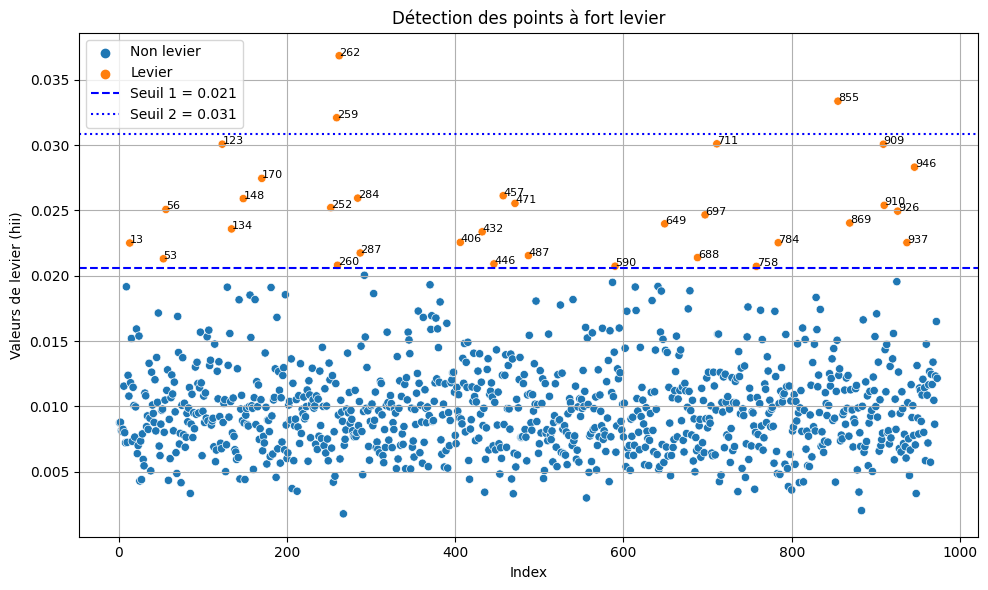

In [77]:
modele1 = modele_full
# 6. Valeurs de levier (hii)
influence = modele1.get_influence()
hat_values = influence.hat_matrix_diag
n = len(hat_values)
p = modele1.df_model + 1  # +1 pour l'intercept

# 7. Seuils
seuil1 = 2 * p / n
seuil2 = 3 * p / n

# 8. Pr√©parer DataFrame
df_H = pd.DataFrame({
    'Index': range(1, n + 1),
    'hii': hat_values,
    'ID': '',
    'group': 'Non levier'
})

# 9. Marquer les points au-del√† du seuil
df_H.loc[df_H['hii'] > seuil1, 'ID'] = df_H['Index']
df_H.loc[df_H['hii'] > seuil1, 'group'] = 'Levier'

# 10. Tracer
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_H, x='Index', y='hii', hue='group')
plt.axhline(y=seuil1, color='blue', linestyle='--', label=f'Seuil 1 = {seuil1:.3f}')
plt.axhline(y=seuil2, color='blue', linestyle=':', label=f'Seuil 2 = {seuil2:.3f}')

# Affichage des √©tiquettes
for _, row in df_H[df_H['group'] == 'Levier'].iterrows():
    plt.text(row['Index'] + 0.3, row['hii'], str(int(row['ID'])), fontsize=8)

plt.xlabel('Index')
plt.ylabel('Valeurs de levier (hii)')
plt.title('D√©tection des points √† fort levier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Nous avons √©galement cherch√© √† d√©tecter les points leviers qui mesurent √† quel point une observation est extr√™me dans l‚Äôespace des variables explicatives.
D'apr√®s nos graphiques, le jeu de donn√©es contient 3 valeurs aberrantes (au-dessus du seuil 2) et 30 points leviers (compris entre les deux seuils) qui ne repr√©sentent qu'une petite partie de notre dataset.

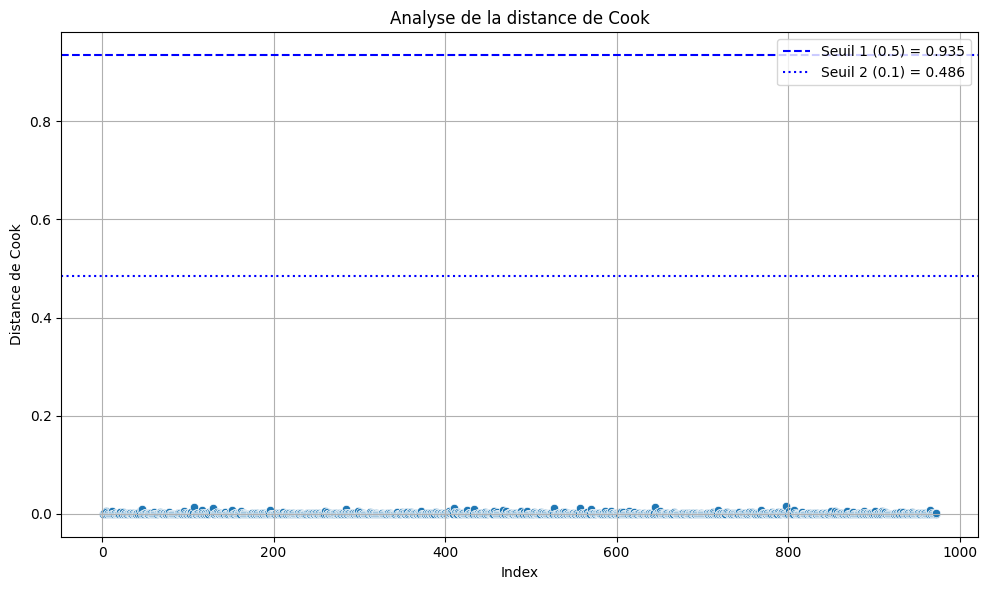

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


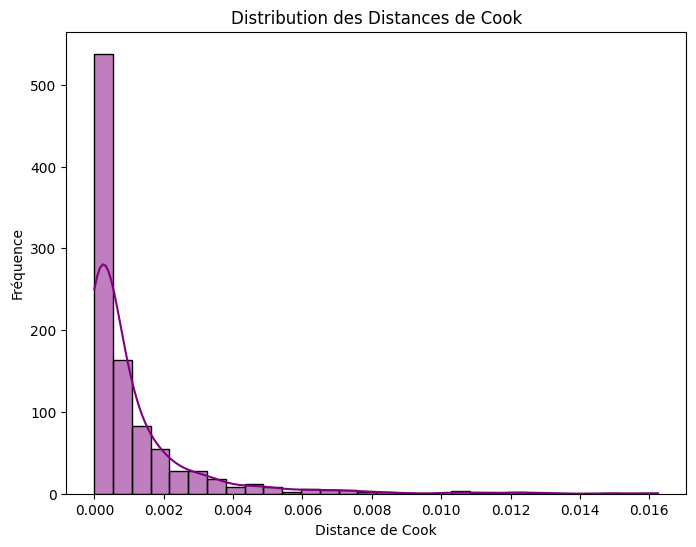

In [78]:

# 1. Distance de Cook
influence = modele1.get_influence()
cooks_d = influence.cooks_distance[0]


# 2. Taille de l‚Äô√©chantillon et degr√©s de libert√©
n = len(cooks_d)
p = int(modele1.df_model + 1)  # +1 pour inclure l'intercept

# 3. Seuils √† partir de la loi F
s1 = f.ppf(0.5, p, n - p)
s2 = f.ppf(0.1, p, n - p)

# 4. Cr√©ation du DataFrame
df_cook = pd.DataFrame({
    'Index': range(1, n + 1),
    'Cook': cooks_d
})

# 5. Trac√© avec seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cook, x='Index', y='Cook')
plt.axhline(y=s1, color='blue', linestyle='--', label=f'Seuil 1 (0.5) = {s1:.3f}')
plt.axhline(y=s2, color='blue', linestyle=':', label=f'Seuil 2 (0.1) = {s2:.3f}')
plt.xlabel('Index')
plt.ylabel('Distance de Cook')
plt.title('Analyse de la distance de Cook')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution des distances de Cook
plt.figure(figsize=(8, 6))
sns.histplot(cooks_d, bins=30, kde=True, color='purple')
plt.title("Distribution des Distances de Cook")
plt.xlabel("Distance de Cook")
plt.ylabel("Fr√©quence")
plt.show()

On remarque cependant qu'aucun point ne poss√®de de distance de Cook √©lev√©e (m√™me au-dessus du seuil acceptable).
De plus le qqplot des r√©sidus studendis√©es contre les quantiles d'une loi de Student de degr√©s de libert√© n‚àíp‚àí1 semble raisonnable et colle √† la courbe lin√©aire. Ainsi on peut consid√©rer que l'ajustement du mod√®le est correct bien qu'il puisse √™tre am√©lior√©.

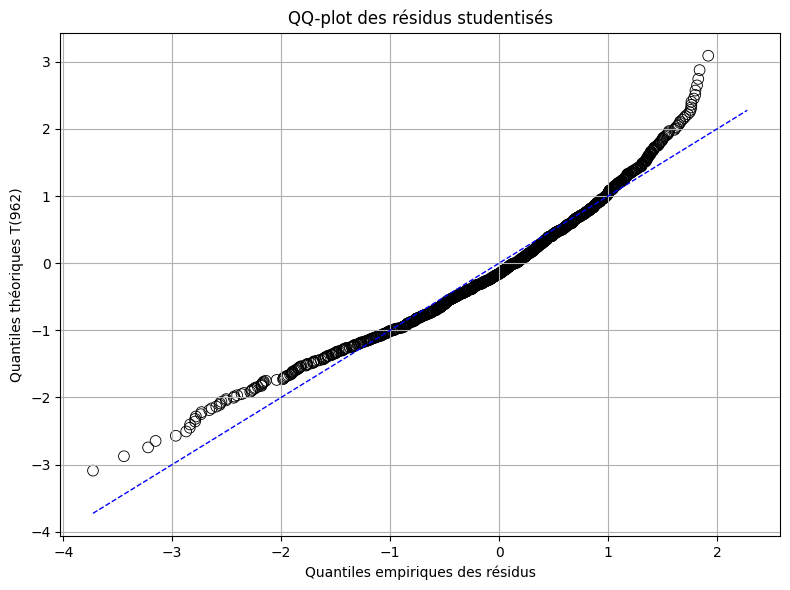

In [79]:
resid_student = modele1.get_influence().resid_studentized_internal
n = len(resid_student)
p = int(modele1.df_model + 1)

# 2. Calcul des quantiles th√©oriques de Student T(n - p - 1)
quant_t = t.ppf((np.arange(1, n + 1)) / n, df=n - p - 1)

# 3. DataFrame pour le QQ-plot
df_qq = pd.DataFrame({
    'Empirical': np.sort(resid_student),
    'Theoretical': np.sort(quant_t)
})

# 4. QQ-plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_qq, x='Empirical', y='Theoretical', s=60, edgecolor='black', facecolor='none')
plt.plot([df_qq['Empirical'].min(), df_qq['Empirical'].max()],
         [df_qq['Empirical'].min(), df_qq['Empirical'].max()],
         linestyle='--', color='blue', linewidth=1)

plt.xlabel("Quantiles empiriques des r√©sidus")
plt.ylabel(f"Quantiles th√©oriques T({n - p - 1})")
plt.title("QQ-plot des r√©sidus studentis√©s")
plt.grid(True)
plt.tight_layout()
plt.show()

ajustement du mod√®le est correct, mais on pourrait encore l'am√©liorer

In [80]:
### VIF

# 2. Ajouter une constante (intercept)
X_const = sm.add_constant(X)

# 4. Calculer les VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# 5. Afficher les VIF
print(vif_data)

                Variable        VIF
0                  const   1.000000
1                    Age   1.013537
2            Weight (kg)  71.434503
3             Height (m)  20.492250
4                Max_BPM   1.009721
5                Avg_BPM   1.008028
6            Resting_BPM   1.007329
7         Fat_Percentage   1.534102
8  Water_Intake (liters)   1.850763
9                    BMI  63.950890


Le **VIF** (Variance Inflation Factor) est un outil qui permet de d√©tecter la multicolin√©arit√©, c‚Äôest-√†-dire, des corr√©lations trop fortes entre les variables explicatives. Et ce que montre notre tableau de VIF, c‚Äôest que les variables ***Weight***, ***Height*** et ***BMI*** sont tr√®s redondantes entre elles (*elles sont de fait li√©es par une relation math√©matique*), ce qui est probl√©matique pour le mod√®le.

En effet, la multicolin√©arit√© n‚Äôaffecte pas la qualit√© globale des pr√©dictions (R¬≤, etc.), mais rend les coefficients instables et peu interpr√©tables, peut conduire √† des p-valeurs trompeuses et rend le mod√®le sensible √† de petites variations dans les donn√©es.

Par exemple, comme ***Weight*** et ***BMI*** sont tr√®s corr√©l√©s, le mod√®le ne va pas bien savoir "√† qui attribuer le m√©rite" de l‚Äôeffet : les deux coefficients peuvent sembler peu significatifs ou avoir des signes incoh√©rents.

# 2e Mod√®le de R√©gression Lin√©aire 
## Mod√®le sans les variables avec un fort VIF

In [81]:
### modele_moins_VIF

# Standardize the continuous data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=continuous_vars)

# 1. Exclure les colonnes avec un fort VIF
cols_to_exclude = ["BMI", "Weight (kg)"] 
df_scaled = df_scaled.drop(columns=cols_to_exclude)
X = df_scaled.drop(columns = ["Calories_Burned"])  # tout sauf cible + exclues
y = df_scaled["Calories_Burned"]  # cible

# 2. Ajouter constante (intercept)
X_const = sm.add_constant(X)

# 3. Ajuster le mod√®le lin√©aire
modele_moins_VIF = sm.OLS(y, X_const).fit()

# 4. R√©sum√© du mod√®le
print(modele_moins_VIF.summary())

### VIF

# 2. Ajouter une constante (intercept)
X_const = sm.add_constant(X)

# 4. Calculer les VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# 5. Afficher les VIF
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     138.8
Date:                Tue, 20 May 2025   Prob (F-statistic):          3.28e-141
Time:                        20:27:23   Log-Likelihood:                -1041.8
No. Observations:                 973   AIC:                             2100.
Df Residuals:                     965   BIC:                             2139.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.888e-

**Nouveau mod√®le :**

***R√©sultats principaux :***
R¬≤ = 0.498, adj_R¬≤ = 0.495 : Tr√®s proche de l‚Äôancien mod√®le (0.504), donc pas de perte significative d‚Äôexplication malgr√© la suppression de deux variables.

F-statistic = 136.8, p-value ‚âà 0 : Le test de Fisher global est significatif, donc le mod√®le reste globalement pertinent car au moins une variable a un effet significatif sur le nombre de calories br√ªl√©es..

***Significativit√© des coefficients :***
- Significatifs : Age, Avg_BPM, Fat_Percentage (p-value < 0.05)
- Non significatifs : Max_BPM, Resting_BPM, Water_Intake, BMI





# 3e Mod√®le de R√©gression Lin√©aire 
## Mod√®le Backward Elimination par p-valeur

Pour ce mod√®le on garde uniquement les variables du mod√®le 2 dont la **p-valeur** est **inf√©rieur √† 0.05**.

On garde ainsi les variables ***Age***, ***Avg_BPM***, ***Fat_Percentage***

In [82]:
### modele_r√©duit_BE

# Standardize the continuous data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=continuous_vars)

# 1. Exclure deux colonnes (par exemple, colonnes 3 et 4 dans l'esprit de oz[, -c(3,4)])
col_selected = ["Age", "Avg_BPM", "Fat_Percentage"] 
X = df_scaled[col_selected]  # tout sauf cible + exclues
y = df_scaled["Calories_Burned"]  # cible

# 2. Ajouter constante (intercept)
X_const = sm.add_constant(X)

# 3. Ajuster le mod√®le lin√©aire
modele_reduit_BE = sm.OLS(y, X_const).fit()

# 4. R√©sum√© du mod√®le
print(modele_reduit_BE.summary())

### VIF

# 4. Calculer les VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# 5. Afficher les VIF
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     319.1
Date:                Tue, 20 May 2025   Prob (F-statistic):          4.76e-144
Time:                        20:27:23   Log-Likelihood:                -1046.4
No. Observations:                 973   AIC:                             2101.
Df Residuals:                     969   BIC:                             2120.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.888e-17      0.023   4.34e

# S√©lection du mod√®le

Dans cette partie, on va comparer les performances avec diff√©rents crit√®res comme AIC, BIC, R¬≤, R¬≤ ajust√©, MSE, MAE, RMSE

In [83]:
# Avec ce code nous voulons explorer tous les sous-ensembles possibles de variables 
# num√©riques explicatives de Calories_Burned, afin d‚Äôidentifier le meilleur compromis 
# entre performance (R¬≤, adj. R¬≤) et complexit√© (AIC, BIC).


# 1. Donn√©es : cible et variables explicatives
y = df_scaled['Calories_Burned']

# 2. Garder uniquement les variables num√©riques pour X
X = df.drop(columns='Calories_Burned')
X = X.select_dtypes(include=[np.number])  # Ne garde que les colonnes num√©riques

# 3. Param√®tre : nombre max de variables
max_features = X.shape[1]
results = []

# 4. Recherche exhaustive sur tous les sous-ensembles
for k in range(1, max_features + 1):
    for subset in itertools.combinations(X.columns, k):
        X_subset = sm.add_constant(X[list(subset)])
        model = sm.OLS(y, X_subset).fit()
        results.append({
            'num_features': k,
            'variables': subset,
            'r2': model.rsquared,
            'adj_r2': model.rsquared_adj,
            'aic': model.aic,
            'bic': model.bic
        })

# 5. Convertir les r√©sultats en DataFrame
results_df = pd.DataFrame(results)

# 6. Meilleurs mod√®les selon les crit√®res
best_r2 = results_df.groupby('num_features')['r2'].max()
best_adj_r2 = results_df.groupby('num_features')['adj_r2'].max()
best_aic = results_df.groupby('num_features')['aic'].min()
best_bic = results_df.groupby('num_features')['bic'].min()

#best_r2, best_adj_r2, best_aic, best_bic
#results_df

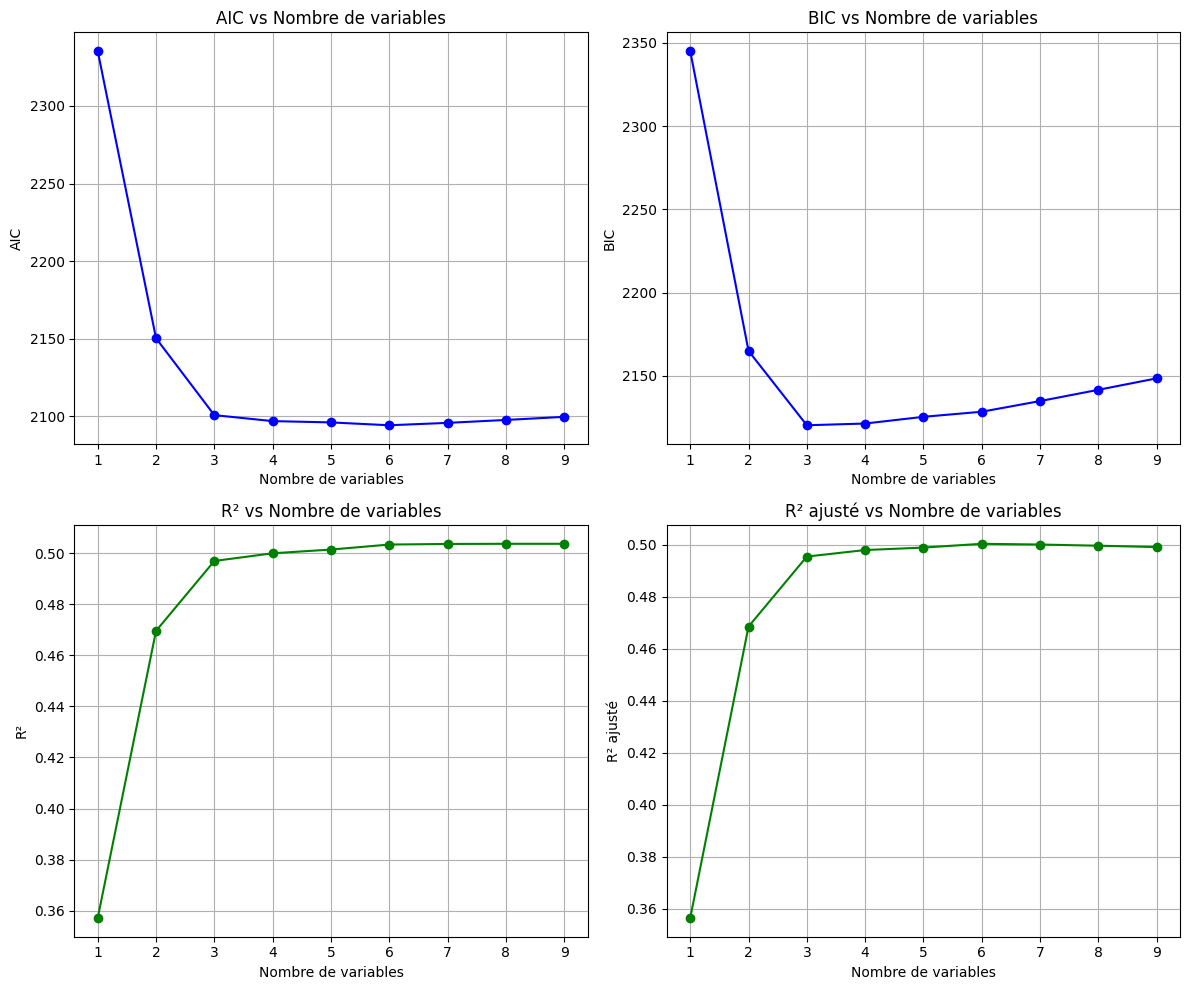

In [84]:
plt.figure(figsize=(12, 10))

# 1. AIC
plt.subplot(2, 2, 1)
plt.plot(best_aic.index, best_aic.values, marker='o', color='blue')
plt.title('AIC vs Nombre de variables')
plt.xlabel('Nombre de variables')
plt.ylabel('AIC')
plt.grid(True)

# 2. BIC
plt.subplot(2, 2, 2)
plt.plot(best_bic.index, best_bic.values, marker='o', color='blue')
plt.title('BIC vs Nombre de variables')
plt.xlabel('Nombre de variables')
plt.ylabel('BIC')
plt.grid(True)

# 3. R¬≤
plt.subplot(2, 2, 3)
plt.plot(best_r2.index, best_r2.values, marker='o', color='green')
plt.title('R¬≤ vs Nombre de variables')
plt.xlabel('Nombre de variables')
plt.ylabel('R¬≤')
plt.grid(True)

# 4. R¬≤ ajust√©
plt.subplot(2, 2, 4)
plt.plot(best_adj_r2.index, best_adj_r2.values, marker='o', color='green')
plt.title('R¬≤ ajust√© vs Nombre de variables')
plt.xlabel('Nombre de variables')
plt.ylabel('R¬≤ ajust√©')
plt.grid(True)

plt.tight_layout()
plt.show()


**Interpr√©tation critique :**
***Performances maximales***
- **R¬≤** maximal = 0.5037 atteint avec 8 ou 9 variables mais ce gain est marginal par rapport √† des mod√®les plus simples.

- **R¬≤ ajust√©** maximal = 0.5003 avec 6 variables, ce qui indique que l‚Äôajout de variables au-del√† de 6 n‚Äôapporte plus d'am√©lioration nette.

***Crit√®res de s√©lection de mod√®le (AIC / BIC)***
- **Meilleur AIC** : mod√®le √† 6 variables : 2094.24

- **Meilleur BIC** : mod√®le √† 3 variables : 2120.28

Cela indique que le mod√®le √† 3 variables est le plus parcimonieux selon BIC (plus strict).

Un mod√®le √† 4 variables semble √™tre un bon compromis global entre performance et complexit√©. 

In [85]:
results_df[(results_df["adj_r2"] == best_adj_r2[6]) | (results_df["adj_r2"] == best_adj_r2[3])
            |(results_df["r2"] == best_r2[6]) | (results_df["r2"] == best_r2[3])]

num_features                                          variables  \
64              3                     (Age, Avg_BPM, Fat_Percentage)   
394             6  (Age, Weight (kg), Height (m), Avg_BPM, Fat_Pe...   

           r2    adj_r2          aic          bic  
64   0.496942  0.495385  2100.754757  2120.276294  
394  0.503372  0.500288  2094.237521  2128.400210

In [86]:
results_df[results_df["bic"]==best_bic[4]]

num_features                                   variables        r2  \
156             4  (Age, Height (m), Avg_BPM, Fat_Percentage)  0.499952   

       adj_r2          aic         bic  
156  0.497885  2096.916099  2121.31802

In [87]:
results_df[ (results_df["aic"] == best_aic[4]) ]


num_features                                   variables        r2  \
156             4  (Age, Height (m), Avg_BPM, Fat_Percentage)  0.499952   

       adj_r2          aic         bic  
156  0.497885  2096.916099  2121.31802

In [88]:
# 1. Meilleur mod√®le avec 4 variables selon le BIC
bic_4 = best_bic.loc[4]  # on acc√®de √† l'index 4 directement
best_model_bic_4 = results_df[(results_df['num_features'] == 4) & (results_df['bic'] == bic_4)]

# 2. Meilleur mod√®le avec 4 variables selon le R¬≤ ajust√©
adj_r2_4 = best_adj_r2.loc[4]
best_model_adjr2_4 = results_df[(results_df['num_features'] == 4) & (results_df['adj_r2'] == adj_r2_4)]

# Affichage
print("üîé Meilleur mod√®le (4 variables) selon BIC :")
print(best_model_bic_4)

print("üîé Meilleur mod√®le (4 variables) selon R¬≤ ajust√© :")
print(best_model_adjr2_4)


üîé Meilleur mod√®le (4 variables) selon BIC :
     num_features                                   variables        r2  \
156             4  (Age, Height (m), Avg_BPM, Fat_Percentage)  0.499952   

       adj_r2          aic         bic  
156  0.497885  2096.916099  2121.31802  
üîé Meilleur mod√®le (4 variables) selon R¬≤ ajust√© :
     num_features                                   variables        r2  \
156             4  (Age, Height (m), Avg_BPM, Fat_Percentage)  0.499952   

       adj_r2          aic         bic  
156  0.497885  2096.916099  2121.31802  


On constate que le meilleur mod√®le √† 4 variables selon le BIC et le R¬≤ ajust√© est identique.

Ce mod√®le est expliqu√© par 4 variables : **Age**, **Height (m)**, **Avg_BPM**, **Fat_Percentage**

In [89]:
# M√©thode 1 : R√©gression lin√©aire multiple
modele1 = modele_full

# M√©thode 2 : Backward Elimination par p-value
# ne garde que les variables avec une p-valeur inf√©rieure √† 0.05
modele2 = modele_reduit_BE

# M√©thode 3 : R√©gression lin√©aire multiple avec s√©lection des variables
# selon les crit√®res AIC, BIC, et r¬≤
col_selected = ["Age", "Height (m)", "Avg_BPM", "Fat_Percentage"] 
X = df_scaled[col_selected]  # tout sauf cible + exclues
y = df_scaled["Calories_Burned"]  # cible

X_const = sm.add_constant(X)

modele_select_var = sm.OLS(y, X_const).fit()
modele3 = modele_select_var

# AIC/BIC du mod√®le complet
aic_1, bic_1 = modele1.aic, modele1.bic
aic_2, bic_2 = modele2.aic, modele2.bic
aic_3, bic_3 = modele3.aic, modele3.aic


# Pr√©dictions

y_pred_1 = modele1.fittedvalues
y_pred_2 = modele2.fittedvalues
y_pred_3 = modele3.fittedvalues

# Fonction de calcul des m√©triques
def get_metrics(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R¬≤": r2_score(y_true, y_pred)
    }

# Regroupement des r√©sultats
metrics = {
    "Mod√®le Complet": get_metrics(y, y_pred_1) | {"AIC": aic_1, "BIC": bic_1},
    "Backward Elimination": get_metrics(y, y_pred_2) | {"AIC": aic_2, "BIC": bic_2},
    "S√©lection des variables": get_metrics(y, y_pred_3) | {"AIC": aic_3, "BIC": bic_3}
}

pd.DataFrame(metrics).T.sort_values(by="AIC", na_position="last")


MSE      RMSE       MAE        R¬≤          AIC  \
S√©lection des variables  0.500048  0.707141  0.559502  0.499952  2096.916099   
Mod√®le Complet           0.496331  0.704507  0.556900  0.503669  2099.655382   
Backward Elimination     0.503058  0.709266  0.560677  0.496942  2100.754757   

                                 BIC  
S√©lection des variables  2096.916099  
Mod√®le Complet           2148.459223  
Backward Elimination     2120.276294

#### Le ***mod√®le "S√©lection des variables"*** :
- **AIC** & **BIC** les plus bas : crit√®re d'information optimal.

- **R¬≤** pratiquement √©quivalent aux autres mod√®les.

- Erreur pr√©dictive tr√®s proche du mod√®le complet (**RMSE** diff. ~0.0026).

*C‚Äôest le mod√®le optimal pour un √©quilibre entre performance, simplicit√© et robustesse.*

#### Le ***mod√®le complet*** :
- L√©g√®rement meilleur **R¬≤**

- Mais **AIC** et **BIC** plus √©lev√©s, surtout BIC (p√©nalise la complexit√©).

- Moins parcimonieux (trop de variables redondantes ?)

#### ***Backward Elimination*** :
- Moins performant en **AIC**, **BIC**, **RMSE** et **R¬≤**.

- Retire probablement trop de variables utiles.

Le mod√®le le plus optimal (mod√®le "s√©lection des variables") est ici le plus performant. Cependant c'est *un mod√®le avec un R¬≤ ‚âà 0.5 signifie que seulement 50‚ÄØ% de la variance de la variable cible (Calories_Burned) est expliqu√©e par les variables ind√©pendantes du mod√®le. Ce n'est pas mauvais, mais ce n‚Äôest pas excellent non plus.*

#### Pourquoi le R¬≤ est √† 0.5 ? *Hypoth√®ses* :
- Mod√®le lin√©aire trop simple : peut-√™tre que les vraies relations sont non lin√©aires.
- Variables pertinentes manquantes : il manque peut-√™tre des facteurs cl√©s dans ton dataset (ex. activit√© physique r√©elle, dur√©e, intensit√©‚Ä¶).
- Effet d‚Äôinteractions non mod√©lis√© : par ex. l'effet combin√© de "Age √ó Fat_Percentage".
- Erreur de mesure ou bruit important dans les donn√©es.

Pour aller plus loin et obtenir un mod√®le plus performant nous pourrions par exemple tester des mod√®les non lin√©aires (arbres de d√©cision, random forest, r√©gressions polynomiales‚Ä¶) ou ajouter d'autres variables/rendre les variables discr√®tes que nous avons supprim√©es d√®s le d√©but continues (nutrition, type d‚Äôactivit√©, dur√©e exacte, fr√©quence cardiaque en continu‚Ä¶).

In [90]:
# Pour modele1 (utilise toutes les variables sauf 'Y')
X_test1 = df_scaled.drop(columns='Calories_Burned', errors='ignore')  # ignore 'Y' if present
X_test1 = sm.add_constant(X_test1, has_constant='add')
Y1 = modele_full.predict(X_test1)

# Pour modele2 (seulement les variables 'Age', 'Height (m)', 'Avg_BPM', 'Fat_Percentage')
X_test2 = df_scaled[['Age', 'Height (m)', 'Avg_BPM', 'Fat_Percentage']]
X_test2 = sm.add_constant(X_test2, has_constant='add')
Y2 = modele_select_var.predict(X_test2)

# 1. Encoder comme pour l'entra√Ænement
X_test1 = df_scaled.drop(columns='Calories_Burned', errors='ignore')
X_test1 = pd.get_dummies(X_test1, drop_first=True).astype(float)

# 2. Ajouter la constante
X_test1 = sm.add_constant(X_test1, has_constant='add')

# 3. Aligner les colonnes avec celles du mod√®le
X_test1 = X_test1.reindex(columns=modele_full.model.exog_names, fill_value=0)

# 4. Pr√©diction
Y1 = modele_full.predict(X_test1)

# Modele1 : toutes les variables 
X_train1 = df_scaled.drop(columns='Calories_Burned')
X_train1 = sm.add_constant(X_train1)
modele1 = sm.OLS(y, X_train1).fit()

# Modele2 : variables s√©lectionn√©es (par exemple, celles du meilleur mod√®le √† 4 variables)
vars_modele2 = ['Age', 'Height (m)', 'Avg_BPM', 'Fat_Percentage']
X_train2 = sm.add_constant(df_scaled[vars_modele2])
modele2 = sm.OLS(y, X_train2).fit()


In [91]:
# Pour modele1 (utilise toutes les variables sauf 'Y')
X_test1 = df_scaled.drop(columns='Calories_Burned', errors='ignore')  # ignore 'Y' if present
X_test1 = sm.add_constant(X_test1, has_constant='add')
Y1 = modele_full.predict(X_test1)

# Pour modele2 (seulement les variables V2, V3, V5, V8, V9)
X_test2 = df_scaled[['Age', 'Height (m)', 'Avg_BPM', 'Fat_Percentage']]
X_test2 = sm.add_constant(X_test2, has_constant='add')
Y2 = modele_select_var.predict(X_test2)

üîç Performance du mod√®le 1 (toutes les variables) :
  ‚û§ MSE : 0.4963
  ‚û§ MAE : 0.5569

üîç Performance du mod√®le 2 (V2, V3, V5, V8, V9) :
  ‚û§ MSE : 0.5000
  ‚û§ MAE : 0.5595


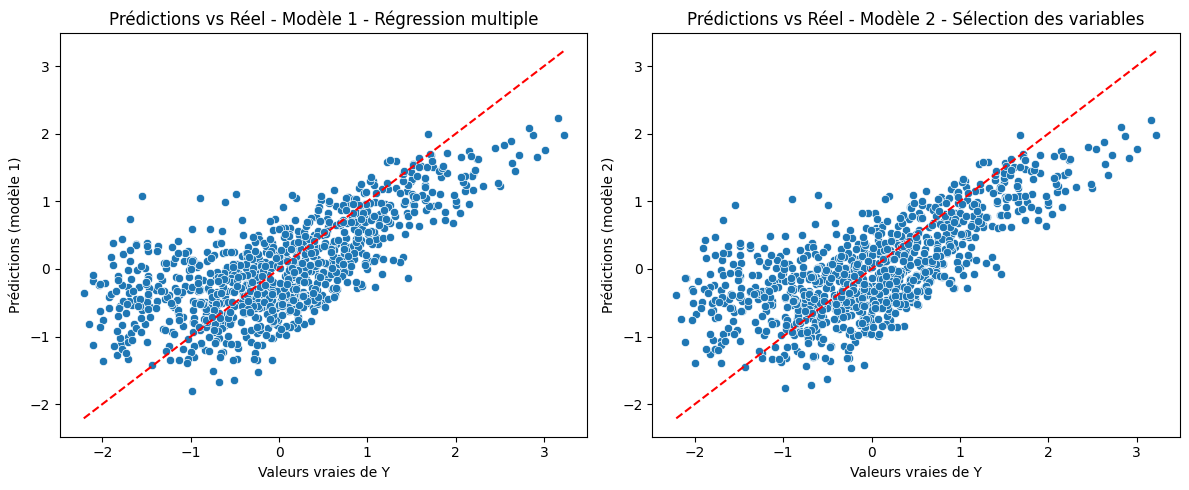

In [92]:
# Assure-toi que la variable vraie 'Y' est bien dans dtest
if 'Calories_Burned' in df_scaled.columns:
    y_true = df_scaled['Calories_Burned']
    
    # MSE et MAE pour modele1
    mse1 = mean_squared_error(y_true, Y1)
    mae1 = mean_absolute_error(y_true, Y1)

    # MSE et MAE pour modele2
    mse2 = mean_squared_error(y_true, Y2)
    mae2 = mean_absolute_error(y_true, Y2)

    print("üîç Performance du mod√®le 1 (toutes les variables) :")
    print(f"  ‚û§ MSE : {mse1:.4f}")
    print(f"  ‚û§ MAE : {mae1:.4f}")

    print("\nüîç Performance du mod√®le 2 (V2, V3, V5, V8, V9) :")
    print(f"  ‚û§ MSE : {mse2:.4f}")
    print(f"  ‚û§ MAE : {mae2:.4f}")

    # Visualisation : vraies valeurs vs pr√©dictions
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_true, y=Y1)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Valeurs vraies de Y")
    plt.ylabel("Pr√©dictions (mod√®le 1)")
    plt.title("Pr√©dictions vs R√©el - Mod√®le 1 - R√©gression multiple")

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_true, y=Y2)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Valeurs vraies de Y")
    plt.ylabel("Pr√©dictions (mod√®le 2)")
    plt.title("Pr√©dictions vs R√©el - Mod√®le 2 - S√©lection des variables")

    plt.tight_layout()
    plt.show()

else:
    print("‚ùó La colonne 'Y' n'est pas pr√©sente dans df_scaled. Impossible de comparer les pr√©dictions aux vraies valeurs.")


#### Erreur quadratique moyenne (MSE)
Le Mod√®le 1 (la r√©gression multiple compl√®te) a un MSE tr√®s l√©g√®rement inf√©rieur √† celui du Mod√®le 2 (s√©lection des variables en fonction de crit√®res (R¬≤, AIC, BIC).

Cela indique que sur l‚Äôensemble complet des variables, il y a une l√©g√®re am√©lioration de la pr√©cision.

Mais l‚Äô√©cart est minime (moins de 0.004) : ce n'est pas significatif en pratique.

#### Erreur absolue moyenne (MAE)
M√™me constat pour la MAE : √©cart tr√®s faible (moins de 0.003).

Le Mod√®le 2 est presque aussi bon que le mod√®le complet, tout en √©tant beaucoup plus simple et interpr√©table.

#### Visualisations :
Les nuages de points des pr√©dictions vs vraies valeurs montrent :

- Une bonne tendance lin√©aire dans les deux cas.

- Une dispersion similaire autour de la diagonale.

*Aucune des deux pr√©dictions ne montre de biais fort ou de d√©rive, ce qui est un bon signe de g√©n√©ralisation.*

Les mod√®les ayant des r√©sultats tr√®s similaires, nous aurons tendance √† choisir le ***mod√®le 2 de s√©lection des variables*** pour sa simplicit√©.

# Validation crois√©e (k-fold)


In [93]:
# Pr√©paration pour validation crois√©e
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Pipeline standardisation + r√©gression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Scores n√©gatifs pour MSE et MAE donc on les inverse apr√®s
r2_scores = cross_val_score(pipeline_lr, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(pipeline_lr, X, y, cv=kf, scoring='neg_mean_squared_error')
mae_scores = -cross_val_score(pipeline_lr, X, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(mse_scores)

# Moyennes
cv_results = {
    "R¬≤ moyen": r2_scores.mean(),
    "MSE moyen": mse_scores.mean(),
    "RMSE moyen": rmse_scores.mean(),
    "MAE moyen": mae_scores.mean()
}

cv_results

{'R¬≤ moyen': 0.493265531130379,
 'MSE moyen': 0.50492866727726,
 'RMSE moyen': 0.7082070252739834,
 'MAE moyen': 0.5622454859192062}

### Interpr√©tation :
#### R¬≤ = 0.493
- En moyenne, le mod√®le explique 49.3 % de la variance des calories br√ªl√©es, sur des donn√©es jamais vues.

- C‚Äôest relativement stable et coh√©rent avec le R¬≤ observ√© hors validation crois√©e (‚âà 0.50), ce qui confirme la robustesse du mod√®le.

#### MSE / RMSE
- RMSE ‚âà 0.708 ‚ûù repr√©sente l‚Äô√©cart moyen quadratique entre pr√©dictions et valeurs r√©elles.

- Comme la variable cible a √©t√© standardis√©e, cela signifie ‚âà 0.7 √©cart-type d'erreur moyenne, ce qui est acceptable mais am√©liorable.

#### MAE ‚âà 0.562
- Moyenne des erreurs absolues (plus robuste que RMSE)

- Interpr√©tation : l‚Äôerreur moyenne est d‚Äôenviron 0.56 √©cart-type par pr√©diction




In [94]:
# Extraction du mod√®le backward elimination d√©j√† entra√Æn√©
col_selected = ["Age", "Height (m)", "Avg_BPM", "Fat_Percentage"]
X_selected = df[col_selected]
y = df["Calories_Burned"]

# R√©ajustement du mod√®le pour affichage clair
X_selected_const = sm.add_constant(X_selected)
modele_final = sm.OLS(y, X_selected_const).fit()

# Coefficients
modele_final.params


const             989.135622
Age                -3.739102
Height (m)       -120.561905
Avg_BPM             6.469479
Fat_Percentage    -26.484206
dtype: float64

### √âquation de pr√©diction des calories br√ªl√©es :

**Calories_Burned = 989.14 ‚àí 3.74‚ãÖAge ‚àí 120.56‚ãÖHeight¬†(m) + 6.47‚ãÖAvg_BPM ‚àí 26.48‚ãÖFat_Percentage**

### Interpr√©tation des coefficients :

#### intercept : const = 989.14 :

C‚Äôest le nombre de calories pr√©dites pour un individu ayant toutes les variables explicatives √©gales √† 0. Ce n‚Äôest pas tr√®s interpr√©table ici, car une personne avec 0 ans, 0 m√®tre de taille, 0 BPM et 0 % de masse grasse‚Ä¶ n‚Äôexiste pas... Mais l‚Äôintercept est n√©cessaire pour ajuster l‚Äô√©quation.

#### Age (-3.74) :
Chaque ann√©e de plus fait baisser les calories br√ªl√©es d'environ 3.74, toutes choses √©gales par ailleurs.

#### Height (m) (-120.56) :
Chaque m√®tre suppl√©mentaire de taille est associ√© √† une baisse d'environ 120.56 calories br√ªl√©es, toutes choses √©gales par ailleurs.

*Cette valeur semble contre-intuitive : il est possible qu‚Äôil y ait une corr√©lation avec d'autres variables (multicolin√©arit√©) qui perturbe l'interpr√©tation. √Ä analyser via la matrice de corr√©lation ou le VIF (Variance Inflation Factor).*

#### Avg_BPM (+6.47) :
Chaque battement par minute suppl√©mentaire en moyenne est associ√© √† une augmentation d'environ 6.47 calories br√ªl√©es.

*Tr√®s intuitif : plus l‚Äôintensit√© cardiaque est √©lev√©e, plus on br√ªle de calories.*

#### Fat_Percentage (-26.48) :
Chaque point de pourcentage de masse grasse suppl√©mentaire est associ√© √† ~26.5 calories br√ªl√©es en moins.

*Cela peut s‚Äôexpliquer par un m√©tabolisme de repos plus faible chez les personnes avec plus de masse grasse.*

# Conclusion

Le mod√®le est relativement stable et g√©n√©ralisable mais pr√®s de 50 % de la variance reste inexpliqu√©e. 

Les raisons √† cela pourraient √™tre les suivantes :
- Mod√®le lin√©aire trop simple : peut-√™tre que les vraies relations sont non lin√©aires.
- Variables pertinentes manquantes : il manque peut-√™tre des facteurs cl√©s dans ton dataset (ex. activit√© physique r√©elle, dur√©e, intensit√©‚Ä¶).
- Effet d‚Äôinteractions non mod√©lis√© : par ex. l'effet combin√© de "Age √ó Fat_Percentage".
- Erreur de mesure ou bruit important dans les donn√©es.

Pour aller plus loin et obtenir un mod√®le plus performant nous pourrions par exemple tester des mod√®les non lin√©aires (arbres de d√©cision, random forest, r√©gressions polynomiales‚Ä¶) ou ajouter d'autres variables/rendre les variables discr√®tes que nous avons supprim√©es d√®s le d√©but continues (nutrition, type d‚Äôactivit√©, dur√©e exacte, fr√©quence cardiaque en continu‚Ä¶).